In [1]:
import seaborn as sns
import pandas as pd
import geopandas as gpd
import pysal
import numpy
import mapclassify
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
meridag = gpd.read_file("merida-kanasin-road.gpkg")
print("\n dtypes: ", meridag.dtypes)
print("\n shape: ", meridag.shape)
print("\n list of columns: ", list(meridag))
meridag
#open street map

C:\Users\danny\miniconda3\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:



 dtypes:  osmid              int64
y                float64
x                float64
street_count       int64
lon              float64
lat              float64
highway           object
geometry        geometry
dtype: object

 shape:  (37906, 8)

 list of columns:  ['osmid', 'y', 'x', 'street_count', 'lon', 'lat', 'highway', 'geometry']


,osmid,y,x,street_count,lon,lat,highway,geometry
0,286974477,2.379984e+06,-9.964126e+06,4,-89.509268,20.900216,,POINT (-9964126.091 2379984.358)
1,5443055966,2.379802e+06,-9.964163e+06,3,-89.509599,20.898686,,POINT (-9964163.026 2379802.104)
2,2198242153,2.380420e+06,-9.964889e+06,3,-89.516119,20.903869,,POINT (-9964888.729 2380419.666)
3,286974740,2.380557e+06,-9.966069e+06,3,-89.526717,20.905018,,POINT (-9966068.560 2380556.620)
4,2198242162,2.380172e+06,-9.965677e+06,3,-89.523199,20.901791,,POINT (-9965676.916 2380172.023)
...,...,...,...,...,...,...,...,...
37901,8282151552,2.394107e+06,-9.987359e+06,1,-89.717975,21.018684,,POINT (-9987359.314 2394106.619)
37902,8282151556,2.394216e+06,-9.987411e+06,3,-89.718437,21.019605,,POINT (-9987410.688 2394216.452)
37903,8282151555,2.394285e+06,-9.987559e+06,1,-89.719767,21.020176,,POINT (-9987558.765 2394284.571)
37904,8290538864,2.397655e+06,-9.977629e+06,1,-89.630564,21.048432,,POINT (-9977628.777 2397654.524)


In [3]:
meridag = gpd.read_file("road-network-projected.shp/edges.shp")
print("\n dtypes: ", meridag.dtypes)
print("\n shape: ", meridag.shape)
print("\n list of columns: ", list(meridag))
meridag
#open street map


 dtypes:  u              int64
v              int64
key            int64
osmid         object
oneway         int64
ref           object
highway       object
maxspeed      object
length       float64
name          object
lanes         object
bridge        object
junction      object
tunnel        object
width         object
access        object
geometry    geometry
dtype: object

 shape:  (102400, 17)

 list of columns:  ['u', 'v', 'key', 'osmid', 'oneway', 'ref', 'highway', 'maxspeed', 'length', 'name', 'lanes', 'bridge', 'junction', 'tunnel', 'width', 'access', 'geometry']


,u,v,key,osmid,oneway,ref,highway,maxspeed,length,name,lanes,bridge,junction,tunnel,width,access,geometry
0,286974477,5443055966,0,42683673,1,MEX 188,primary,90,173.530,None,None,None,None,None,None,None,"LINESTRING (-9964126.091 2379984.358, -9964163..."
1,286974477,2198242153,0,209633188,0,None,residential,None,829.226,None,None,None,None,None,None,None,"LINESTRING (-9964126.091 2379984.358, -9964147..."
2,5443055966,5443055948,0,42683673,1,MEX 188,primary,90,134.567,None,None,None,None,None,None,None,"LINESTRING (-9964163.026 2379802.104, -9964194..."
3,5443055966,5443055955,0,565071113,1,None,primary_link,None,14.896,None,None,None,None,None,None,None,"LINESTRING (-9964163.026 2379802.104, -9964158..."
4,2198242153,2198242137,0,"[684178840, 209633186]",0,None,residential,None,735.164,None,None,None,None,None,None,None,"LINESTRING (-9964888.729 2380419.666, -9964913..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102395,8282151556,8282151557,0,891105832,0,None,residential,None,111.203,None,None,None,None,None,None,None,"LINESTRING (-9987410.688 2394216.452, -9987384..."
102396,8282151556,8282151555,0,891105831,0,None,residential,None,152.027,None,None,None,None,None,None,None,"LINESTRING (-9987410.688 2394216.452, -9987448..."
102397,8282151555,8282151556,0,891105831,0,None,residential,None,152.027,None,None,None,None,None,None,None,"LINESTRING (-9987558.765 2394284.571, -9987448..."
102398,8290538864,324352816,0,892007331,1,None,trunk,80,20.957,Anillo Periférico Licenciado Manuel Berzunza,3,None,None,None,None,None,"LINESTRING (-9977628.777 2397654.524, -9977651..."


# EDA

In [4]:
merida = gpd.read_file("merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp")
print("\n dtypes: ", merida.dtypes)
print("\n shape: ", merida.shape)
print("\n list of columns: ", list(merida))


 dtypes:  CVEGEO          object
CVE_ENT         object
CVE_MUN         object
CVE_LOC         object
CVE_AGEB        object
                ...   
VPH_SINRTV      object
VPH_SINLTC      object
VPH_SINCIN      object
VPH_SINTIC      object
geometry      geometry
Length: 230, dtype: object

 shape:  (593, 230)

 list of columns:  ['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB', 'NOM_ENT', 'NOM_MUN', 'NOM_LOC', 'POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_0A2_F', 'P_0A2_M', 'P_3YMAS', 'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M', 'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M', 'P_15YMAS', 'P_15YMAS_F', 'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_3A5', 'P_3A5_F', 'P_3A5_M', 'P_6A11', 'P_6A11_F', 'P_6A11_M', 'P_8A14', 'P_8A14_F', 'P_8A14_M', 'P_12A14', 'P_12A14_F', 'P_12A14_M', 'P_15A17', 'P_15A17_F', 'P_15A17_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'P_15A49_F', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'REL_H_M', 'POB0_14', 'POB15_64', 'POB65_MAS', 'PROM_HNV', 'P

In [5]:
merida_new = merida [['CVEGEO','POBTOT', 'geometry']]
#clave municipio, localidad, geo

In [6]:
merida_new.head(5)

,CVEGEO,POBTOT,geometry
0,3105000010027,21,"POLYGON ((-9981448.233 2402584.366, -9981444.5..."
1,3105000010031,253,"POLYGON ((-9965919.566 2390554.093, -9966007.0..."
2,3105000010120,1444,"POLYGON ((-9973428.542 2392332.531, -9973426.9..."
3,3105000010154,186,"POLYGON ((-9986022.068 2384222.245, -9986019.5..."
4,3105000010169,1580,"POLYGON ((-9975818.495 2391691.959, -9975809.3..."


In [7]:
merida_new.isnull().sum()

CVEGEO      0
POBTOT      0
geometry    0
dtype: int64

In [8]:
merida_new.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
588    False
589    False
590    False
591    False
592    False
Length: 593, dtype: bool

In [9]:
# Let's calculate the percentage of each PobTot status category.
merida_avg = merida_new.POBTOT.value_counts(normalize=True)
merida_avg

0       0.006745
21      0.005059
1840    0.005059
1795    0.005059
24      0.005059
          ...   
2368    0.001686
1253    0.001686
313     0.001686
2360    0.001686
4095    0.001686
Name: POBTOT, Length: 540, dtype: float64

In [10]:
merida_new.POBTOT.describe()

count     593.000000
mean     1850.172007
std      1254.441857
min         0.000000
25%       971.000000
50%      1740.000000
75%      2612.000000
max      7244.000000
Name: POBTOT, dtype: float64

Text(0.5, 0, 'POBTOTAL')

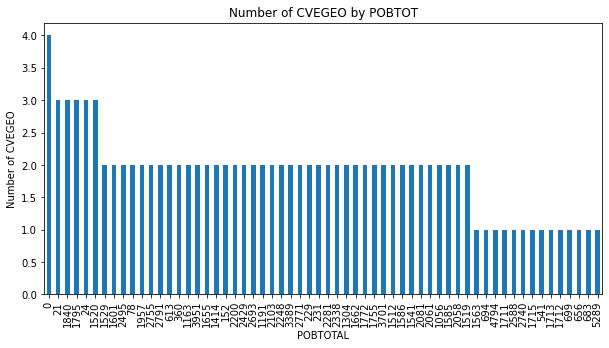

In [11]:
# Plotting a Histogram
merida_new.POBTOT.value_counts().nlargest(60).plot(kind='bar', figsize=(10,5))
plt.title('Number of CVEGEO by POBTOT')
plt.ylabel('Number of CVEGEO')
plt.xlabel('POBTOTAL')

In [12]:
merida_new[merida_new.POBTOT == 21]

,CVEGEO,POBTOT,geometry
0,3105000010027,21,"POLYGON ((-9981448.233 2402584.366, -9981444.5..."
438,3105000016581,21,"POLYGON ((-9975680.535 2379563.258, -9975629.3..."
483,3105000754439,21,"POLYGON ((-9984229.716 2392854.141, -9984242.1..."


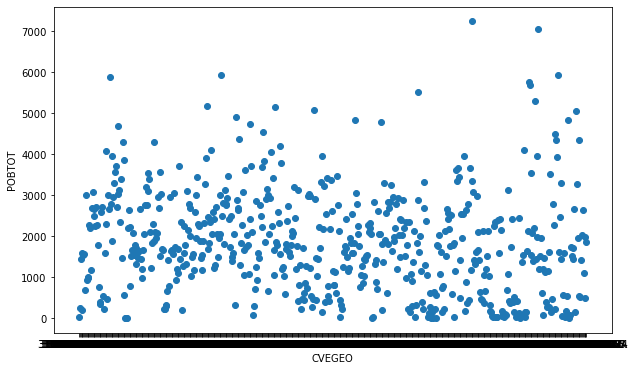

In [13]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(merida_new['CVEGEO'], merida_new["POBTOT"])
ax.set_xlabel('CVEGEO')
ax.set_ylabel("POBTOT")
plt.show()

# Quantitative data class

In [14]:
merida_new

,CVEGEO,POBTOT,geometry
0,3105000010027,21,"POLYGON ((-9981448.233 2402584.366, -9981444.5..."
1,3105000010031,253,"POLYGON ((-9965919.566 2390554.093, -9966007.0..."
2,3105000010120,1444,"POLYGON ((-9973428.542 2392332.531, -9973426.9..."
3,3105000010154,186,"POLYGON ((-9986022.068 2384222.245, -9986019.5..."
4,3105000010169,1580,"POLYGON ((-9975818.495 2391691.959, -9975809.3..."
...,...,...,...
588,3104100010846,2649,"POLYGON ((-9969326.300 2389206.019, -9969288.7..."
589,3104100010850,1089,"POLYGON ((-9969914.602 2387471.674, -9969980.1..."
590,3104100010865,1971,"POLYGON ((-9969746.204 2387367.949, -9969861.7..."
591,310410001087A,495,"POLYGON ((-9973646.930 2381847.370, -9973651.3..."


En el caso de Freedman-Diaconis, la función objetivo es minimizar la diferencia entre el área bajo la densidad de granos estimada con base en la muestra y el área bajo la distribución poblacional teórica que generó la muestra

In [58]:
data = merida_new['POBTOT']

In [16]:
from scipy import stats
stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")

C:\Users\danny\miniconda3\lib\site-packages\scipy\stats\stats.py:2898: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  warnings.warn(


1641.0

In [17]:
import numpy as np
from scipy import stats


def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

In [18]:
freedman_diaconis(data=data, returnas="width")

390.64926565996154

In [19]:
NBR_BINS = freedman_diaconis(data=data, returnas="bins")
NBR_BINS

19

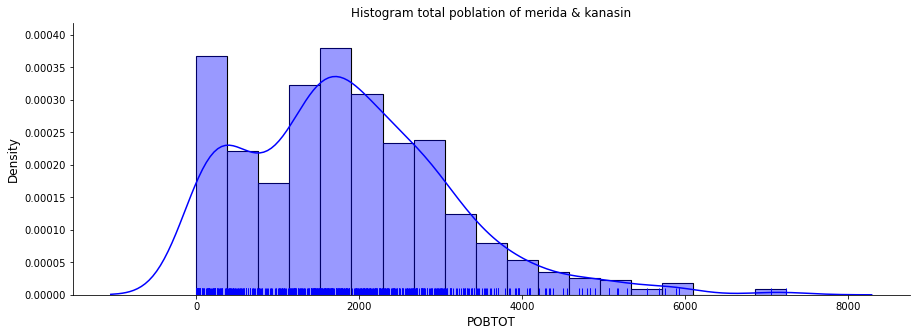

In [20]:
# countplot
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(data, NBR_BINS, density=True, color="#FFFFFF", edgecolor="k", linewidth=1.1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
h = sns.distplot(merida['POBTOT'], bins=19, rug=True, color="blue")
plt.xlabel("POBTOT", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Histogram total poblation of merida & kanasin", fontsize=12)
plt.show()

In [21]:
counts, bins, patches = h.hist(merida['POBTOT'], bins=19)

In [22]:
"""
The counts object captures how many observations 
each category in the classification has
"""
counts

array([83., 50., 39., 73., 86., 70., 53., 54., 28., 18., 12.,  8.,  6.,
        5.,  2.,  4.,  0.,  0.,  2.])

In [23]:
"""
The bin object stores these break points we are interested in 
when considering classification schemes
"""
bins

array([   0.        ,  381.26315789,  762.52631579, 1143.78947368,
       1525.05263158, 1906.31578947, 2287.57894737, 2668.84210526,
       3050.10526316, 3431.36842105, 3812.63157895, 4193.89473684,
       4575.15789474, 4956.42105263, 5337.68421053, 5718.94736842,
       6100.21052632, 6481.47368421, 6862.73684211, 7244.        ])

# equal intervals

In [24]:
#distancia de intervalos iguales
ei5 = mapclassify.EqualInterval(merida['POBTOT'], k=19)
ei5

EqualInterval             

     Interval        Count
--------------------------
[   0.00,  381.26] |    83
( 381.26,  762.53] |    50
( 762.53, 1143.79] |    39
(1143.79, 1525.05] |    73
(1525.05, 1906.32] |    86
(1906.32, 2287.58] |    70
(2287.58, 2668.84] |    53
(2668.84, 3050.11] |    54
(3050.11, 3431.37] |    28
(3431.37, 3812.63] |    18
(3812.63, 4193.89] |    12
(4193.89, 4575.16] |     8
(4575.16, 4956.42] |     6
(4956.42, 5337.68] |     5
(5337.68, 5718.95] |     2
(5718.95, 6100.21] |     4
(6100.21, 6481.47] |     0
(6481.47, 6862.74] |     0
(6862.74, 7244.00] |     2

This yields 5 bins, with the first having a lower bound of 0.00 and an upper bound of 1448.80 which contains 222 observations. 

Equal intervals have the dual advantages of simplicity and ease of interpretation. However, this rule only considers the extreme values of the distribution and, in some cases, this can result in one or more classes being sparse.

To avoid the potential problem of sparse classes, the quantiles of the distribution can be used to identify the class boundaries. Indeed, each class will have approximately ∣nk∣ observations using the quantile classifier. If k=5 the sample quintiles are used to define the upper limits of each class resulting in the following classification:

# quantiles

In [25]:
#quantiles
q5 = mapclassify.Quantiles(merida_new.POBTOT, k=19)
q5

Quantiles                 

     Interval        Count
--------------------------
[   0.00,   78.00] |    33
(  78.00,  231.00] |    31
( 231.00,  446.95] |    30
( 446.95,  675.63] |    31
( 675.63, 1029.53] |    31
(1029.53, 1210.84] |    31
(1210.84, 1439.11] |    32
(1439.11, 1542.05] |    31
(1542.05, 1662.00] |    32
(1662.00, 1796.16] |    30
(1796.16, 2000.11] |    31
(2000.11, 2133.79] |    31
(2133.79, 2316.37] |    32
(2316.37, 2539.26] |    31
(2539.26, 2757.21] |    31
(2757.21, 2997.63] |    31
(2997.63, 3347.79] |    31
(3347.79, 3960.68] |    31
(3960.68, 7244.00] |    32

In [26]:
#widths
q5.bins[1:]-q5.bins[:-1]

array([ 153.        ,  215.94736842,  228.68421053,  353.89473684,
        181.31578947,  228.26315789,  102.94736842,  119.94736842,
        134.15789474,  203.94736842,  133.68421053,  182.57894737,
        222.89473684,  217.94736842,  240.42105263,  350.15789474,
        612.89473684, 3283.31578947])

# Mean standar deviation

In [27]:
msd = mapclassify.StdMean(merida_new['POBTOT'])
msd

StdMean                   

     Interval        Count
--------------------------
(   -inf, -658.71] |     0
(-658.71,  595.73] |   115
( 595.73, 3104.61] |   396
(3104.61, 4359.06] |    60
(4359.06, 7244.00] |    22

Este clasificador se utiliza mejor cuando los datos se distribuyen normalmente o, al menos, cuando la media de la muestra es una medida significativa para anclar la clasificación. Claramente, este no es el caso de nuestros datos de ingresos, ya que el sesgo positivo da como resultado una pérdida de información cuando usamos la desviación estándar. La falta de simetría conduce a un límite superior inadmisible para la primera clase, así como a una concentración de la gran mayoría de valores en la clase media. 

# maximum breaks

In [28]:
mb5 = mapclassify.MaximumBreaks(merida_new['POBTOT'], k=19)
mb5

MaximumBreaks             

     Interval        Count
--------------------------
[   0.00, 3749.50] |   553
(3749.50, 3885.50] |     3
(3885.50, 4009.00] |     6
(4009.00, 4158.00] |     4
(4158.00, 4250.50] |     1
(4250.50, 4437.50] |     5
(4437.50, 4628.50] |     2
(4628.50, 4766.00] |     2
(4766.00, 4870.50] |     3
(4870.50, 4984.00] |     1
(4984.00, 5118.00] |     2
(5118.00, 5236.50] |     2
(5236.50, 5409.00] |     1
(5409.00, 5607.00] |     1
(5607.00, 5719.50] |     1
(5719.50, 5821.00] |     1
(5821.00, 6494.50] |     3
(6494.50, 7149.50] |     1
(7149.50, 7244.00] |     1

Es un enfoque apropiado cuando estamos interesados en asegurarnos de que las observaciones de cada clase estén separadas de las de las clases vecinas. Como tal, funciona bien en los casos en que la distribución de valores no es unimodal. Además, el algoritmo es relativamente rápido de calcular. Sin embargo, su simplicidad a veces puede causar resultados inesperados. En la medida en que solo considere las principales diferencias k − 1 entre valores consecutivos, se pueden ignorar otras diferencias y disimilitudes dentro del grupo más matizadas 

# box plot

Es una combinación de los clasificadores de desviación estándar y cuantiles.

In [29]:
bp = mapclassify.BoxPlot(merida_new['POBTOT'])
bp

BoxPlot                     

      Interval         Count
----------------------------
(    -inf, -1490.50] |     0
(-1490.50,   971.00] |   149
(  971.00,  1740.00] |   148
( 1740.00,  2612.00] |   148
( 2612.00,  5073.50] |   136
( 5073.50,  7244.00] |    12

In [30]:
bp1 = mapclassify.BoxPlot(merida_new['POBTOT'], hinge=1)
bp1

BoxPlot                   

     Interval        Count
--------------------------
(   -inf, -670.00] |     0
(-670.00,  971.00] |   149
( 971.00, 1740.00] |   148
(1740.00, 2612.00] |   148
(2612.00, 4253.00] |   122
(4253.00, 7244.00] |    26

Si lo hace, afectará la definición de las clases atípicas, así como las clases internas vecinas. 

# Head-Tail Breaks

In [31]:
ht = mapclassify.HeadTailBreaks(merida_new['POBTOT'])
ht

HeadTailBreaks            

     Interval        Count
--------------------------
[   0.00, 1850.17] |   325
(1850.17, 2931.15] |   166
(2931.15, 3849.00] |    64
(3849.00, 4799.16] |    22
(4799.16, 5585.31] |     9
(5585.31, 6212.29] |     5
(6212.29, 7149.50] |     1
(7149.50, 7244.00] |     1

Para los datos con una distribución de colas pesadas, como la ley de potencia y las distribuciones logarítmicas normales, el clasificador de roturas de cabeza y cola puede ser particularmente eficaz. 

# Jenks Caspall

El algoritmo intenta mejorar la función objetivo considerando el movimiento de observaciones entre clases adyacentes. Por ejemplo, el valor más grande en el quintil más bajo se consideraría para pasar al segundo quintil, mientras que el valor más bajo en el segundo quintil se consideraría para un posible movimiento al primer quintil. Se realizará el movimiento candidato que resulte en la mayor reducción de la función objetivo, y el proceso continuará hasta que no sean posibles otros movimientos de mejora. 

In [32]:
numpy.random.seed(12345)
jc5 = mapclassify.JenksCaspall(merida_new['POBTOT'], k=19)
jc5

JenksCaspall              

     Interval        Count
--------------------------
[   0.00,   97.00] |    35
(  97.00,  313.00] |    41
( 313.00,  495.00] |    27
( 495.00,  683.00] |    23
( 683.00,  902.00] |    19
( 902.00, 1108.00] |    23
(1108.00, 1330.00] |    37
(1330.00, 1529.00] |    42
(1529.00, 1679.00] |    40
(1679.00, 1797.00] |    26
(1797.00, 1952.00] |    22
(1952.00, 2153.00] |    43
(2153.00, 2338.00] |    33
(2338.00, 2544.00] |    27
(2544.00, 2837.00] |    44
(2837.00, 3191.00] |    37
(3191.00, 3657.00] |    29
(3657.00, 4555.00] |    26
(4555.00, 7244.00] |    19

# Fisher

El segundo algoritmo óptimo adopta un enfoque de programación dinámica para minimizar la suma de las desviaciones absolutas alrededor de las medianas de clase. A diferencia del enfoque de Jenks-Caspall, se garantiza que Fisher-Jenks producirá una clasificación óptima para un número predeterminado de clases

In [33]:
numpy.random.seed(12345)
fj5 = mapclassify.FisherJenks(merida_new['POBTOT'], k=19)
fj5

FisherJenks               

     Interval        Count
--------------------------
[   0.00,  231.00] |    64
( 231.00,  516.00] |    41
( 516.00,  812.00] |    35
( 812.00, 1108.00] |    28
(1108.00, 1371.00] |    40
(1371.00, 1637.00] |    67
(1637.00, 1879.00] |    56
(1879.00, 2153.00] |    47
(2153.00, 2368.00] |    37
(2368.00, 2600.00] |    29
(2600.00, 2853.00] |    39
(2853.00, 3154.00] |    35
(3154.00, 3474.00] |    22
(3474.00, 3797.00] |    14
(3797.00, 4103.00] |    12
(4103.00, 4555.00] |     8
(4555.00, 5289.00] |    11
(5289.00, 5934.00] |     6
(5934.00, 7244.00] |     2

# Maxp

Es similar en espíritu a Jenks Caspall en el sentido de que considera el intercambio codicioso entre clases adyacentes para mejorar la función objetivo. Sin embargo, es una heurística, por lo que, a diferencia de Fisher-Jenks, no hay una solución óptima garantizada: 

In [34]:
mp5 = mapclassify.MaxP(merida_new['POBTOT'], k=19)
mp5

MaxP                      

     Interval        Count
--------------------------
[   0.00,   76.00] |    31
(  76.00,  221.00] |    28
( 221.00,  448.00] |    36
( 448.00,  683.00] |    31
( 683.00, 1208.00] |    61
(1208.00, 1211.00] |     1
(1211.00, 1520.00] |    57
(1520.00, 1563.00] |     8
(1563.00, 1795.00] |    59
(1795.00, 1987.00] |    30
(1987.00, 2003.00] |     2
(2003.00, 2173.00] |    36
(2173.00, 2531.00] |    55
(2531.00, 2573.00] |     5
(2573.00, 2755.00] |    28
(2755.00, 3000.00] |    32
(3000.00, 3350.00] |    31
(3350.00, 3961.00] |    31
(3961.00, 7244.00] |    31

desviación absoluta alrededor de las medianas de clase” (ADCM)
proporciona una medida de ajuste que permite la comparación de clasificadores alternativos para el mismo valor de k.

          0
0   51720.0
1   56714.0
2  454629.0
3   38817.0
4   42144.0


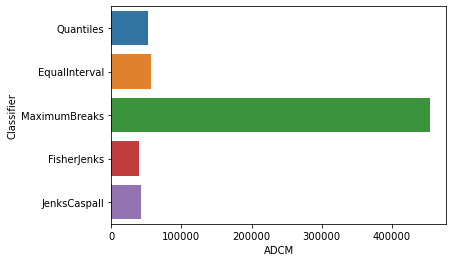

In [35]:
class5 = q5, ei5, mb5, fj5, jc5
fits = numpy.array([ c.adcm for c in class5])
data = pd.DataFrame(fits)
print(data)
data['classifier'] = [c.name for c in class5]
data.columns = ['ADCM', 'Classifier']
ax = sns.barplot(y='Classifier', x='ADCM', data=data)
# ADCM provides a global measure of fit 
#which can be used to compare the alternative classifiers.

Como era de esperar, el clasificador de Fisher-Jenks dominan a todos los demás clasificadores k = 19 con un ACDM de 38817. el clasificador de jenks-caspall funciona bien. El clasificador de Maximum break tiene un ajuste muy deficiente

El desviación absoluta alrededor de las medianas de clase” ADCM proporciona una medida global de ajuste que se puede utilizar para comparar los clasificadores alternativos. Como complemento de esta perspectiva global, puede ser revelador considerar cómo se clasificó cada una de las observaciones espaciales en los enfoques alternativos. Para hacer esto, podemos agregar el atributo bin de clase (yb) generado por los clasificadores PySAL como columnas adicionales en el marco de datos y presentarlos conjuntamente en una tabla: 

In [36]:
merida_new['q5'] = q5.yb
merida_new['ei5'] = ei5.yb
merida_new['ht'] = ht.yb
merida_new['mb5'] = mb5.yb
merida_new['msd'] = msd.yb
merida_new['fj5'] = fj5.yb
merida_new['jc5'] = jc5.yb

In [37]:
mxs = merida_new.sort_values('POBTOT')
mxs

,CVEGEO,POBTOT,geometry,q5,ei5,ht,mb5,msd,fj5,jc5
413,3105000016223,0,"POLYGON ((-9968632.346 2391251.989, -9968632.6...",0,0,0,0,1,0,0
54,310500001085A,0,"POLYGON ((-9984915.621 2384489.679, -9985021.1...",0,0,0,0,1,0,0
572,3104100010672,0,"POLYGON ((-9971094.865 2381852.532, -9971189.0...",0,0,0,0,1,0,0
411,3105000016204,0,"POLYGON ((-9976128.679 2380861.862, -9976120.1...",0,0,0,0,1,0,0
342,3105000015386,3,"POLYGON ((-9982462.048 2383808.317, -9982601.0...",0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
36,310500001060A,5888,"POLYGON ((-9978157.092 2387239.736, -9978151.1...",18,15,5,16,4,17,18
166,3105000013074,5926,"POLYGON ((-9976120.181 2380858.253, -9976128.6...",18,15,5,16,4,17,18
559,3104100010526,5934,"POLYGON ((-9969290.727 2384722.981, -9969192.7...",18,15,5,16,4,17,18
536,3104100010282,7055,"POLYGON ((-9968643.309 2383625.222, -9968615.7...",18,18,6,17,4,18,18


In [38]:
def highlight_values(val):
    if val==0:
        return 'background-color: %s' % '#ffffff'
    elif val==1:
        return 'background-color: %s' % '#e0ffff'
    elif val==2:
        return 'background-color: %s' % '#b3ffff'
    elif val==3:
        return 'background-color: %s' % '#87ffff'
    elif val==4:
        return 'background-color: %s' % '#62e4ff'
    else:
        return ''

In [39]:
t = mxs[['CVEGEO', 'POBTOT', 'q5', 'ei5', 'ht', 'mb5', 'msd', 'fj5', 'jc5']]
t.style.applymap(highlight_values)

,CVEGEO,POBTOT,q5,ei5,ht,mb5,msd,fj5,jc5
413,3105000016223,0,0,0,0,0,1,0,0
54,310500001085A,0,0,0,0,0,1,0,0
572,3104100010672,0,0,0,0,0,1,0,0
411,3105000016204,0,0,0,0,0,1,0,0
342,3105000015386,3,0,0,0,0,1,0,0
515,3105000933820,5,0,0,0,0,1,0,0
56,3105000010879,7,0,0,0,0,1,0,0
55,3105000010864,8,0,0,0,0,1,0,0
417,3105000016350,9,0,0,0,0,1,0,0
407,3105000016168,14,0,0,0,0,1,0,0


Ninguna localidad es consistente en todos los clasificadores
La DEM tiene la clase 0 vacia, por el  limite superior inadmisible y la concentracion excesiva de valores en la clase normal

Habiendo considerado la evaluación de la distribución estadística de los valores de los atributos y los enfoques de clasificación alternativos, el siguiente paso es seleccionar la simbolización y el esquema de color. Junto con la elección del clasificador, estos determinarán la efectividad general del mapa de coropletas para representar la distribución espacial de los valores de los atributos. 

# Color

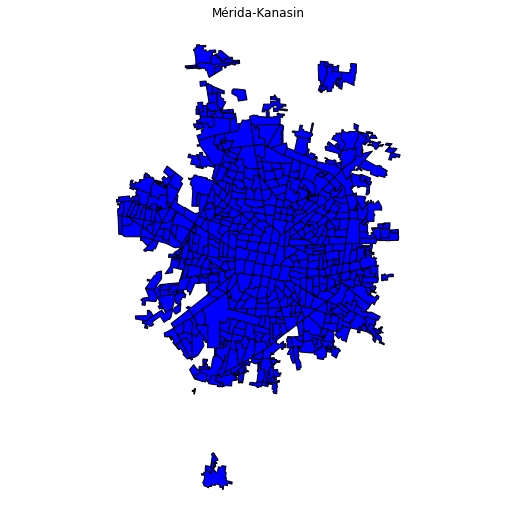

In [40]:
mx = merida_new
f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(ax=ax, color='blue', edgecolor='k')
ax.set_axis_off()
ax.set_title('Mérida-Kanasin')
plt.axis('equal')
plt.show()

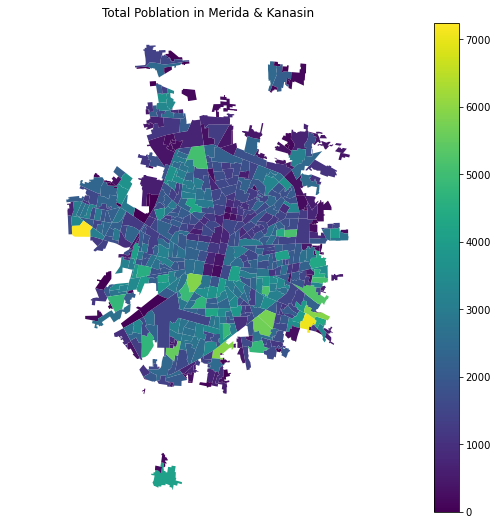

In [41]:
f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(ax=ax, column='POBTOT', legend=True, legend_kwds={'fmt':'{:.0f}'})
ax.set_axis_off()
ax.set_title('Total Poblation in Merida & Kanasin')
plt.axis('equal')
plt.show()

#viridis

# Sequential Color Schemes

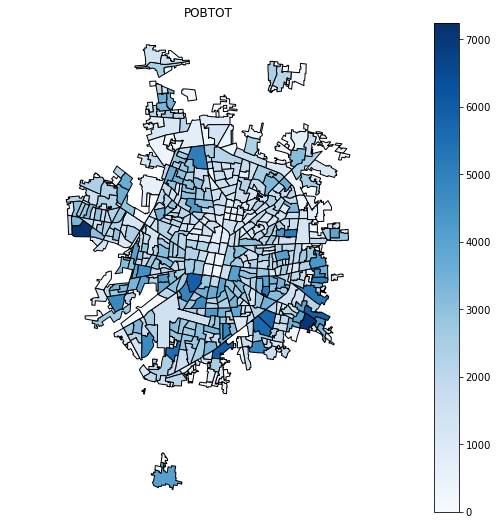

In [42]:
f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(ax=ax, column='POBTOT', legend=True, legend_kwds={'fmt':'{:.0f}'}, \
         cmap='Blues' , edgecolor='black')
ax.set_axis_off()
ax.set_title('POBTOT')
plt.axis('equal')
plt.show()

# Diverging Color Schemes

 Esto es útil cuando se desea poner el mismo énfasis en los valores críticos de rango medio, así como en los extremos en ambos extremos de la distribución. Los colores claros se utilizan para enfatizar la clase de rango medio, mientras que los colores oscuros con matices contrastantes se utilizan para distinguir los extremos bajos y altos.

In [43]:
#ayuraaaa

In [44]:
rnk = mx.rank(ascending=False) # ascending ranks 1=high, n=lowest
rnk['CVEGEO']=mx['CVEGEO']
delta_rnk = rnk.POBTOT
delta_rnk
cls = numpy.digitize(delta_rnk, [-5, 0, 5, 20])
cls

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Aquí hemos creado cuatro clases para los cambios de rango: [-inf, -5), [-5, 0), [0, 5), [5, 20]. Tenga en cuenta que estos son rangos descendentes, por lo que el estado con mayor poblacion en cualquier período tiene un rango de 1 y, por lo tanto, al considerar el cambio en los rangos, un cambio negativo refleja un descenso en la distribución del ingreso. 

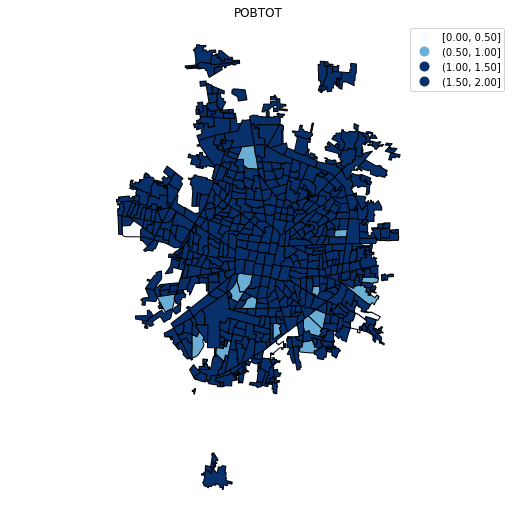

In [45]:
f, ax = plt.subplots(1, figsize=(9, 9))
mx.assign(cl=cls).plot(ax=ax, column='cl', categorical=True, cmap='Blues',
           scheme='equal_interval', k=4, edgecolor="black", legend = True)
ax.set_axis_off()
ax.set_title('POBTOT')
plt.axis('equal')
plt.show()

In [46]:
##################################################

In [47]:
mx['POBTOT'].head()

0      21
1     253
2    1444
3     186
4    1580
Name: POBTOT, dtype: int64

In [48]:
import numpy as np
h5 = mapclassify.UserDefined(mx['POBTOT'], bins=np.arange(1,6).tolist())
h5.fmt = '{:.0f}'
h5

UserDefined         

  Interval     Count
--------------------
[   0,    1] |     4
(   1,    2] |     0
(   2,    3] |     1
(   3,    4] |     0
(   4,    5] |     1
(   5, 7244] |   587

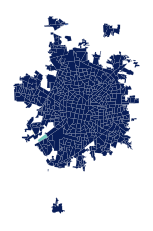

In [49]:
_ = h5.plot(mx, axis_on=False)

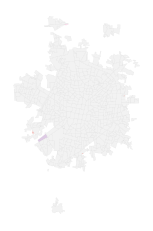

In [50]:
_ = h5.plot(mx, cmap='Pastel1', axis_on=False)

la autocorrelación espacial puede definirse formalmente como la "ausencia de aleatoriedad espacial".

In [51]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from pysal.viz import splot
from splot.esda import plot_moran
import contextily
# Analysis
import geopandas
import pandas
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed

In [52]:
pobtot_data_path = 'merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp'
ref = gpd.read_file(pobtot_data_path, index_col='CVEGEO_code')
ref.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 593 entries, 0 to 592
Columns: 230 entries, CVEGEO to geometry
dtypes: geometry(1), int64(2), object(227)
memory usage: 1.0+ MB


In [53]:
lads = geopandas.read_file("merida-kanasin-road.gpkg")
lads.info()

C:\Users\danny\miniconda3\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37906 entries, 0 to 37905
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   osmid         37906 non-null  int64   
 1   y             37906 non-null  float64 
 2   x             37906 non-null  float64 
 3   street_count  37906 non-null  int64   
 4   lon           37906 non-null  float64 
 5   lat           37906 non-null  float64 
 6   highway       37906 non-null  object  
 7   geometry      37906 non-null  geometry
dtypes: float64(4), geometry(1), int64(2), object(1)
memory usage: 2.3+ MB


In [54]:
db = geopandas.GeoDataFrame(lads.join(ref[['POBTOT']]), crs=lads.crs)\
              .to_crs(epsg=4326)\
              [['osmid', 'street_count', 'POBTOT', 'geometry']]\
              .dropna()
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 593 entries, 0 to 592
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   osmid         593 non-null    int64   
 1   street_count  593 non-null    int64   
 2   POBTOT        593 non-null    float64 
 3   geometry      593 non-null    geometry
dtypes: float64(1), geometry(1), int64(2)
memory usage: 23.2 KB


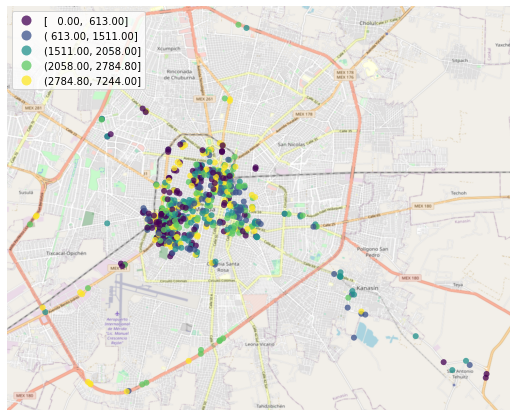

In [55]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(column='POBTOT', 
        cmap='viridis', 
        scheme='quantiles',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={"loc": 2},
        ax=ax
       )
contextily.add_basemap(ax, 
                       crs=db.crs, 
                       url=ctx.tile_providers.OSM_A
                      )
ax.set_axis_off()

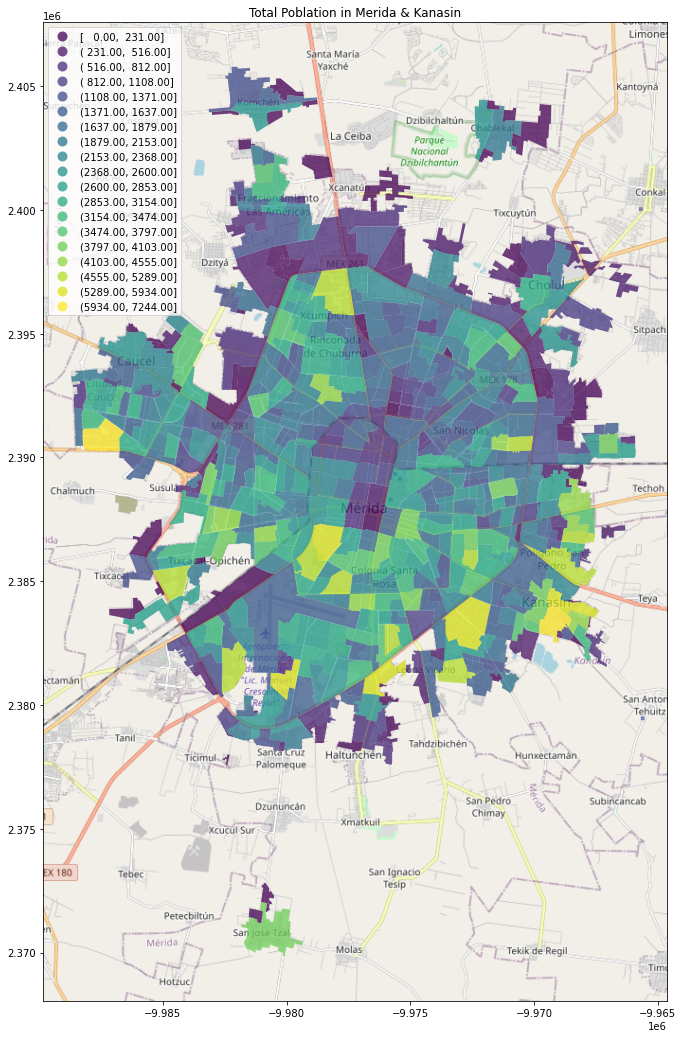

In [56]:
f, ax = plt.subplots(1, figsize=(18, 18))
mx.plot(ax=ax, column='POBTOT', legend=True, scheme='fisherjenks',
         cmap='viridis' , edgecolor='black',
        k=19,
        linewidth=0., 
        alpha=0.75, 
        legend_kwds={"loc": 2},
       )
contextily.add_basemap(ax, 
                        crs=mx.crs,
                       url=ctx.tile_providers.OSM_A
                      )
ax.set_title('Total Poblation in Merida & Kanasin')

plt.savefig('population_merida&Kanasin2020V2.jpg')